__1. In class we stated that the equilibrium price of a forward contract should behave  according  to  the  formula $F_0=S_0e^{rT}$.   Demonstrate  that  this  is true  using  the  arbitrage  principle.   Assume  that  you  are  dealing  with  an investment asset that pays no dividends unless stated otherwise. Specifically, answer the following:__

__(a) Suppose $F_0 > S_0e^{rT}$.  Does this imply an arbitrage opportunity? Explain.__

Yes, there would be an arbitrage opportunity in the market. Since the forward and spot contracts are both on the same underlying asset, if there were some slight disequilibrium in the pricing of the two contracts, there would be an opportunity for arbitrage.

More specifically, in this example, one could simply sell a forward contract at time=0, and use the proceeds to buy the underlying in the spot market. At time=T, what was purchased at the spot price will be delivered to the buyer of the forward contract, realizing a profit due to arbitrage.

__(b)  Now suppose $F_0 < S_0e^{rT}$.  Does this imply an arbitrage opportunity? Explain.__

Yes, there would again be an arbitrage opportunity, for the same reason stated in part (a).

This time, one could sell (short) the underlying in the spot market at time=0, and use the proceeds to buy a forward contract. At time=T, you would collect the underlying from the forward contract and return it to close out the short position, realizing a profit.

__(c)  Now assume that you are dealing with either a dividend-paying asset in the form of discrete dollar dividend payments, or a continuous dividend yield.  How does this change the pricing equation?  Explain.__

With continuous dividends, the formula becomes $F_0=S_0e^{(r- \delta) T}$, where $\delta$ is the dividend yield. This is becuase the price of the forward must include a provision for dividends, since the forward contract holder will not collect the dividends, and thus must pay less for the contract.

__(d)  Now assume that you are dealing with a consumption commodity with storage  costs,  and  that  holding  the  physical  commodity  has  certain benefits (i.e.  a convenience yield).  How does this change the pricing equation?  Explain.__

The equation will be just as in part (c), $F_0=S_0e^{(r- \delta) T}$, where $\delta$ is the convenience yield. As in part (c), the holder of the physical commodity has the ability to use the commodity as needed, which is why they pay a convenience yield that acts similarly to a dividend with a stock, and the forward contract holder will pay less for the contract as they are giving up this convenience yield.

__(e)  In  class  we  argued  that  all  of  this  depends  upon  the  possibility  of physical  delivery  of  the  contract,  which  guarantees  that $F_T=S_T$,that is that the futures price at maturity is equal to the spot price at maturity.  First, explain why that is.  Second, what would happen if $F_T \neq S_T$?  Carefully explain.__

At time=T, $F_T=S_T$ must hold because the two trades would be exact substitutes for eachother. In other words, at expiry the futures contract now behaves exactly like a spot trade, as the time to expiry is 0. If this is not the case, there would be a very quick and easy arbitrage opportunity. One could simply sell the overpriced contract and use the proceeds to buy the underpriced contract, making a profit at time=T with no risk and infinite upside. This would occur until supply and demand forced the two to return to equilibrium.

__(f) Consider a new kind of forward contract called a prepaid forward.  It is very similar to a standard forward contract.  The only difference is that the long party pays the short party at time $t=0$, but still takes delivery from the short party at $t=T$.  How must the standard pricing formula be modified to properly price the prepaid forward?  Carefully explain your logic.  Why would anyone ever want to transact in such a contract?  Do we actually see prepaid forward contracts in the real world, or only in finance textbooks?__

A normal forward price is shown to be the future value of the spot price, since that is when money will be collected. Since a prepaid forward contract seller collects the proceeds at time=0, the price of the prepaid forward contract is simply $F^P_{0,T}=S_0$. The holder of the prepaid contract will however also not collect dividends paid, so if a discrete dividend were introduced, the formula will change to $F^P_{0,T}=S_0 - \Sigma^n_{i=1} PV_0 D_{t_i}$, and with continuous dividends $F^P_{0,T}=S_0e^{-\delta T}$.

__2. In the Midterm folder on Canvas there is a subfolder titled Data.  In it you will find historical nearby daily settlement futures prices as well as daily New York Harbor spot prices for WTI Crude Oil for the period 01/01/1992 to 12/31/1993.  Using these data answer the following questions:__

__(a)  Test the series for unit roots using the Augmented Dickey-Fuller test. Conduct the tests for prices in levels, and first price differences.  Also conduct the test in log-price levels and log-price first differences.  What do  you  conclude?   Do  any  of  the  series  contain  a  unit  root?   Which ones?  Are the results what you expected, or did they surprise you?__

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from scipy.stats import linregress

In [53]:
rawData = pd.read_csv("WTI-Prices-1992-to-1993.csv", parse_dates=True)
rawData['nplog'] = np.log(rawData.Spot)
rawData['nplog_futures'] = np.log(rawData.Futures)
rawData.head()

,Date,Spot,Futures,nplog,nplog_futures
0,1992-01-02,19.43,19.49,2.966818,2.969902
1,1992-01-03,19.22,19.23,2.955951,2.956472
2,1992-01-06,19.24,19.21,2.956991,2.955431
3,1992-01-07,18.72,18.69,2.929592,2.927989
4,1992-01-08,17.95,17.87,2.887590,2.883123


_Testing spot series for unit-root_

In [54]:
result = adfuller(rawData.Spot, maxlag=1, autolag='BIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.280351
p-value: 0.928241
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


I fail to reject the null hypothesis of a unit-root for the spot series, showing that it is non-stationary. This is what I expected as it is typical of financial data since they have a positive expected return.

_Testing futures series for unit-root_

In [55]:
result = adfuller(rawData.Futures, maxlag=1, autolag='BIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.287451
p-value: 0.927263
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


I also fail to reject the null hypothesis of a unit-root for the futures series. This also makes sense, since as we saw in question 1 the futures price is just the future value of the spot price, so since the spot series is a random walk, the futures series should be as well.

_Testing spot series first-differences_

In [56]:
first_dif_spot = rawData.Spot.diff()
result = adfuller(first_dif_spot[1:], maxlag=1, autolag='BIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.470295
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


I reject the null hypothesis of a unit-root for the first differenced spot series. This is what I expected because returns should be integrated of order 0.

_Testing futures series first-differences_

In [57]:
first_dif_futures = rawData.Futures.diff()
result = adfuller(first_dif_futures[1:], maxlag=1, autolag='BIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -23.392796
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


I reject the null hypothesis of a unit-root for the first differenced futures series. This also is what I expected since the futures prices are derived from the spot prices.

_Testing log-spot series_

In [58]:
result = adfuller(rawData.nplog, maxlag=1, autolag='BIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.024364
p-value: 0.960501
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


I also fail to reject the null in the log series, which makes sense because the continuously compounded return should be positive as well, so this series should be integrated of order 1.

_Testing log-futures series_

In [59]:
result = adfuller(rawData.nplog_futures, maxlag=1, autolag='BIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.006035
p-value: 0.958030
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


I again fail to reject.

_Testing log-spot first-differences_

In [60]:
first_dif_nplog = rawData.nplog.diff()
result = adfuller(first_dif_nplog[1:], maxlag=1, autolag='BIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.623511
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


I reject the null.

_Testing log-futures first-differences_

In [61]:
first_dif_nplog_futures = rawData.nplog_futures.diff()
result = adfuller(first_dif_nplog_futures[1:], maxlag=1, autolag='BIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -23.604051
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


I reject the null.

Each of the series that is not a first-difference contains a unit-root, which is what I expected as explained individually above.

__(b)  Make  time  series  plots  of  the  series  in  price  levels,  first  differences, log-price levels, and log-price first differences.__

_Spot/Futures Series_

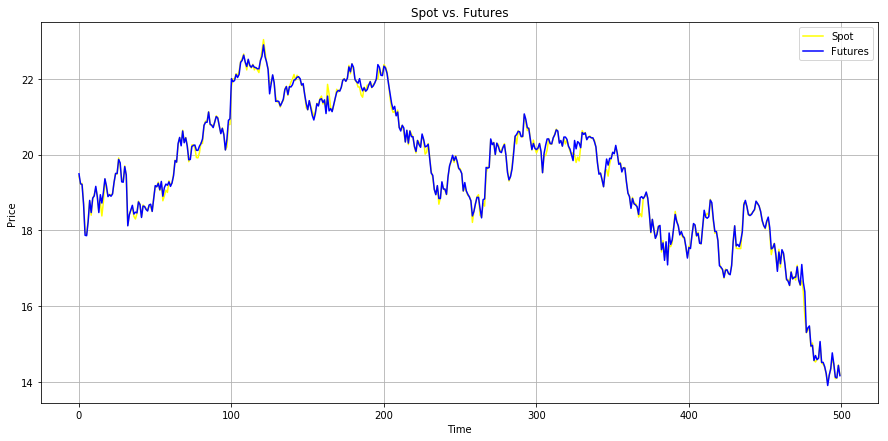

In [62]:
x = pd.Series(rawData.Spot)
y = pd.Series(rawData.Futures)
x.plot(grid=True, legend=True, color='yellow', label='Spot')
y.plot(grid=True, title='Spot vs. Futures', legend=True, color='blue', label='Futures', figsize=(15,7))
plt.xlabel('Time')
plt.ylabel('Price');

_Spot/Futures First-Differences Series_

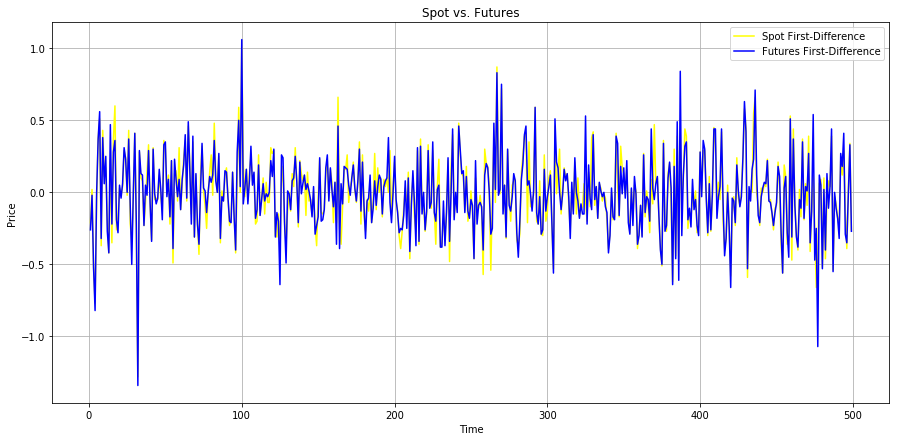

In [63]:
x = pd.Series(first_dif_spot)
y = pd.Series(first_dif_futures)
x.plot(grid=True, legend=True, color='yellow', label='Spot First-Difference')
y.plot(grid=True, title='Spot vs. Futures', legend=True, color='blue', label='Futures First-Difference', figsize=(15,7))
plt.xlabel('Time')
plt.ylabel('Price');

_Log Spot/Futures Series_

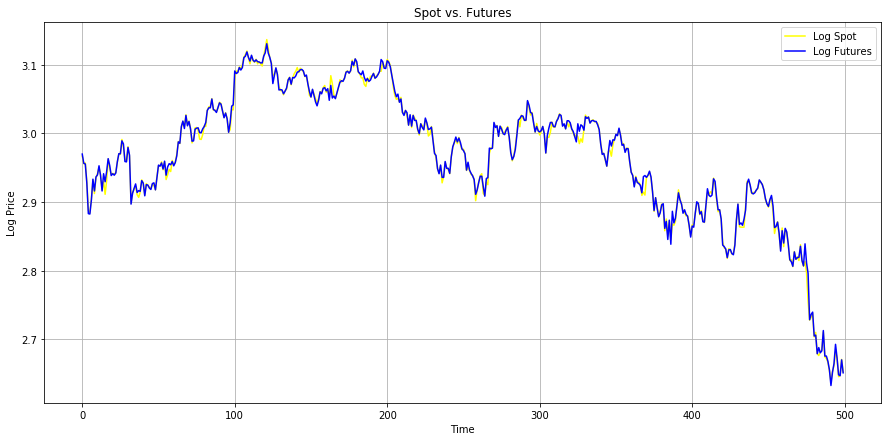

In [64]:
x = pd.Series(rawData.nplog)
y = pd.Series(rawData.nplog_futures)
x.plot(grid=True, legend=True, color='yellow', label='Log Spot')
y.plot(grid=True, title='Spot vs. Futures', legend=True, color='blue', label='Log Futures', figsize=(15,7))
plt.xlabel('Time')
plt.ylabel('Log Price');

_Log Spot/Futures First-Differences Series_

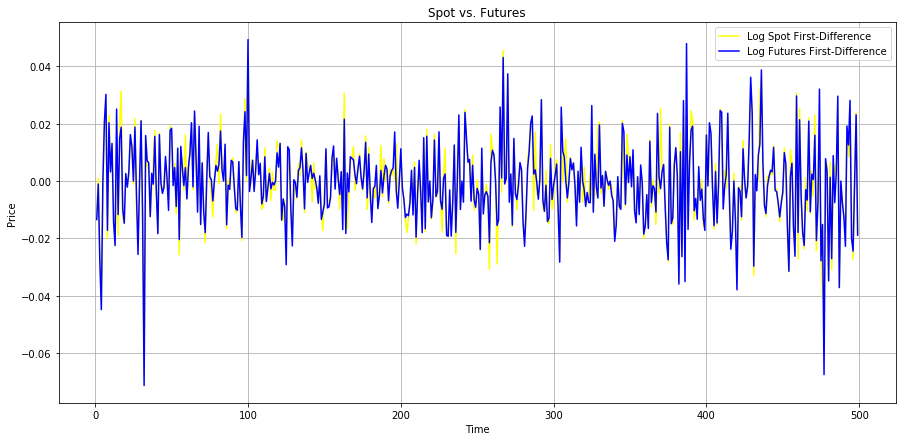

In [65]:
x = pd.Series(first_dif_nplog)
y = pd.Series(first_dif_nplog_futures)
x.plot(grid=True, legend=True, color='yellow', label='Log Spot First-Difference')
y.plot(grid=True, title='Spot vs. Futures', legend=True, color='blue', label='Log Futures First-Difference', figsize=(15,7))
plt.xlabel('Time')
plt.ylabel('Price');

__(c)  Carry  out  the  Engle-Granger  two-step  procedure  to  test  for  cointegration  between  the  series?   What  are  the  results?   Are  the  series cointegrated?   If so,  what  is the  cointegrating  vector?  Carefully explain.__

In [66]:
x = pd.Series(rawData.Spot)
y = pd.Series(rawData.Futures)
reg = stats.linregress(x,y)
uhat = y - reg.intercept - reg.slope * x

In [67]:
resids = pd.Series(uhat)
reg.slope

0.9928897176398659

In [68]:
result = adfuller(resids, maxlag=1, autolag='BIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.774878
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


The cointegrating vector is [1, -0.9929]. This shows that the series is cointegrated, as there is a parameter 0.9929 that is explaining the movement of the basis spread. The ADF Statistic of -14.7749 shows there is very strong evidence to reject the null hypothesis of a unit-root in the cointegrating relationship. This means there should be a trading strategy on the basis of oil should this spread deviate from its long-run mean.

__(d)  Make a plot of the estimated residuals and comment on the graph as relates to the issue of of cointegration.__

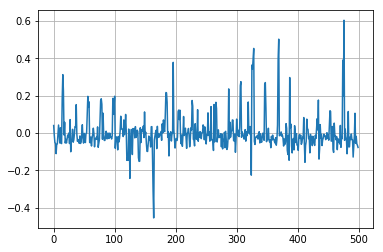

In [69]:
resids.plot(grid=True);

The residuals are mean-reverting, meaning that the series are cointegrated and there should be some error-correction model between the spot and futures prices of oil.

__(e)  Using  linear  regression  calculate  a  rolling  minimum-variance  hedge ratio for each day of 1993 based on 60 prior days observations.  Plot a time-series of the hedge-ratios.  Comment on the nature of the plotted series.  What does this say about the dynamic stability of the hedge ratio?__

In [70]:
end_1992 = rawData.loc[rawData['Date'] == '1992-12-31']
start_1993 = end_1992.index[0]+1

In [71]:
rawData_1993 = rawData[start_1993:]
x = pd.Series(rawData_1993.Spot)
y = pd.Series(rawData_1993.Futures)

N = rawData_1993.shape[0]

dS = np.diff(x)
dF = np.diff(y)

In [72]:
M = 60
L = N - M
h = np.empty(L)

In [73]:
ibeg = 0
iend = M

for i in range(L):
    reg = linregress(dF[ibeg:iend], dS[ibeg:iend])
    h[i] = reg.slope
    ibeg += 1
    iend += 1

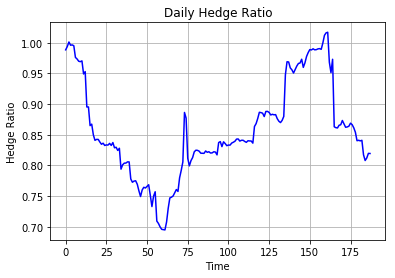

In [74]:
ts = pd.Series(h)
ts.plot(grid=True, color="blue", title="Daily Hedge Ratio")
plt.xlabel("Time")
plt.ylabel("Hedge Ratio");

We see in this time series that the dynamic hedge is very dynamic. The hedge varies greatly just in the year 1993. Pirrong argues that this minimum variance hedge is the best situation for MGRM, who instead used a 1 for 1 hedge ratio. I find it interesting that the ratio does approach 1 at multiple points in the minimum variance hedge, but also gets down to 0.70. Since MGRM had superior knowledge to the rest of the market, a minimum variance hedge would have kept their profits more stable, but with the 1 for 1 hedge they had the ability to skew their distribution in a positive manner, leading to a much more positive expected return while only increasing the left tail by a small amount. Though Pirrong does have a point about the dynamic nature of the daily hedge, I do not agree with him when he says that MGRM was not hedging by using the 1 for 1 ratio.

__3. In  this  problem  you  will  simulate  values  for  spot  prices  and  basis  for heating oil and gasoline following the models of Bollen and Whaley in their paper Simulating Supply (which  is  in  the  readings  file).__

__(a)  Simulate  45  days  of  prices  for  spot  and  daily  settlement  prices  for futures (via the basis equation).  Looking at figure 1 in the paper use initial values of 0.69 for heating oil and 0.80 for gasoline.  Use an initial value for heating oil basis of −0.02 and −0.01 for gasoline.  See Table 2 in the paper for the other parameter values.__

In [75]:
def drawCorrelatedNormals(mn1 = 0.0, sd1 = 1.0, mn2 = 0.0, sd2 = 1.0, rho = 0.5, numReps = 100):
    z1 = np.random.normal(size=numReps, loc=mn1, scale=sd1)
    z2 = np.random.normal(size=numReps, loc=mn2, scale=sd2)
    z2 = rho * z1 + np.sqrt((1.0 - rho**2.0)) * z2
    
    return (z1,z2)

In [76]:
x1, x2 = drawCorrelatedNormals(sd1=0.11, sd2=0.116, rho=0.705, numReps=45)
np.corrcoef(x1, x2)

array([[1.        , 0.64318465],
       [0.64318465, 1.        ]])

_Spot Prices_

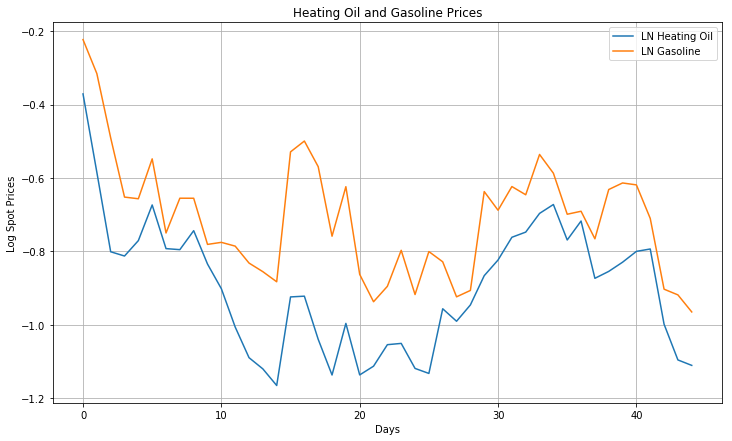

In [77]:
a1 = 0.342
b1 = 0.539
s1 = 0.11
S1 = 0.69
a2 = 0.391
b2 = 0.560
s2 = 0.116
S2 = 0.80
numReps = 45
rho = 0.705

lnSpot1 = np.zeros(numReps)
lnSpot2 = np.zeros(numReps)

lnSpot1[0] = np.log(S1)
lnSpot2[0] = np.log(S2)


z1, z2 = drawCorrelatedNormals(sd1=s1, sd2=s2, rho=rho, numReps=numReps)

for t in range(1, numReps):
    lnSpot1[t] = lnSpot1[t-1] + a1 * (b1 - np.exp(lnSpot1[t-1])) + z1[t]
    lnSpot2[t] = lnSpot2[t-1] + a2 * (b2 - np.exp(lnSpot2[t-1])) + z2[t] 

ts = pd.DataFrame({'LN Heating Oil' : lnSpot1, 'LN Gasoline' : lnSpot2})

ts.plot(grid=True, figsize=(12, 7), title='Heating Oil and Gasoline Prices')
plt.xlabel('Days')
plt.ylabel('Log Spot Prices');

In [78]:
ts.head()

,LN Heating Oil,LN Gasoline
0,-0.371064,-0.223144
1,-0.584409,-0.315645
2,-0.800738,-0.490660
3,-0.812298,-0.651886
4,-0.770381,-0.656462


_Basis_

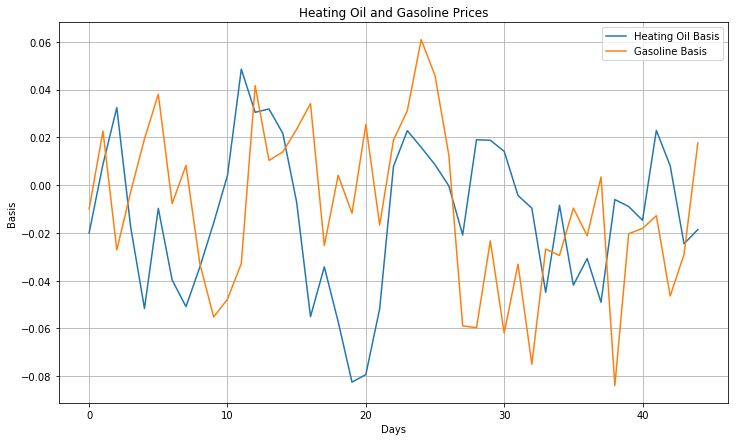

In [79]:
a1 = 0.663
b1 = -0.009
s1 = 0.025
S1 = -0.02
a2 = 0.424
b2 = -0.015
s2 = 0.029
S2 = -0.01
numReps = 45
rho = -0.358

Basis1 = np.zeros(numReps)
Basis2 = np.zeros(numReps)

Basis1[0] = (S1)
Basis2[0] = (S2)


z1, z2 = drawCorrelatedNormals(sd1=s1, sd2=s2, rho=rho, numReps=numReps)

for t in range(1, numReps):
    Basis1[t] = a1 * Basis1[t-1] + b1 * np.exp(lnSpot1[t-1]) + z1[t]
    Basis2[t] = a2 * Basis2[t-1] + b2 * np.exp(lnSpot2[t-1]) + z2[t] 

ts = pd.DataFrame({'Heating Oil Basis' : Basis1, 'Gasoline Basis' : Basis2})

ts.plot(grid=True, figsize=(12, 7), title='Heating Oil and Gasoline Prices')
plt.xlabel('Days')
plt.ylabel('Basis');

In [80]:
ts.head()

,Heating Oil Basis,Gasoline Basis
0,-0.020000,-0.010000
1,0.008731,0.022612
2,0.032418,-0.027161
3,-0.017473,-0.002902
4,-0.051675,0.019347


_Futures Prices_

In [81]:
lnFutures1 = np.zeros(numReps)
lnFutures2 = np.zeros(numReps)

for i in range(0, numReps):
    lnFutures1[i] = Basis1[i] + lnSpot1[i]
    lnFutures2[i] = Basis2[i] + lnSpot2[i]

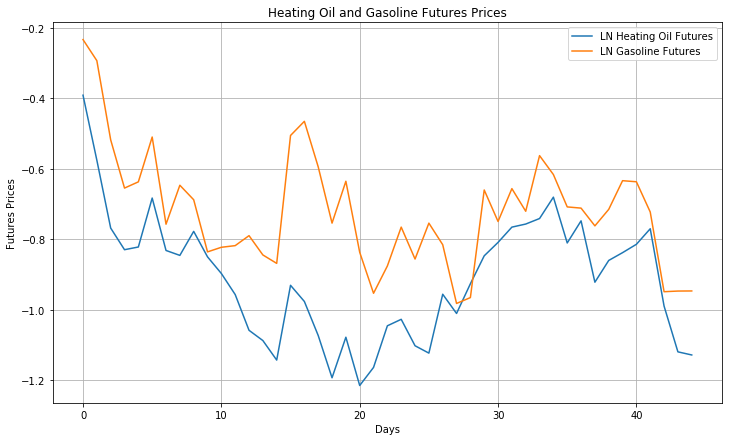

In [82]:
ts = pd.DataFrame({'LN Heating Oil Futures' : lnFutures1, 'LN Gasoline Futures' : lnFutures2})

ts.plot(grid=True, figsize=(12, 7), title='Heating Oil and Gasoline Futures Prices')
plt.xlabel('Days')
plt.ylabel('Futures Prices');

In [83]:
ts.head()

,LN Heating Oil Futures,LN Gasoline Futures
0,-0.391064,-0.233144
1,-0.575677,-0.293033
2,-0.768320,-0.517821
3,-0.829771,-0.654788
4,-0.822057,-0.637116


__(b)  Make  time  series  plots  labeling  the  x-axis  as date  and  the  y-axis  as dollar prices.  Assume a starting date of November 15, 1991.  Plot spot prices, basis, and futures prices separately but combining the graphs for heating oil and gasoline together for each.  Clearly label the series in each graph.__

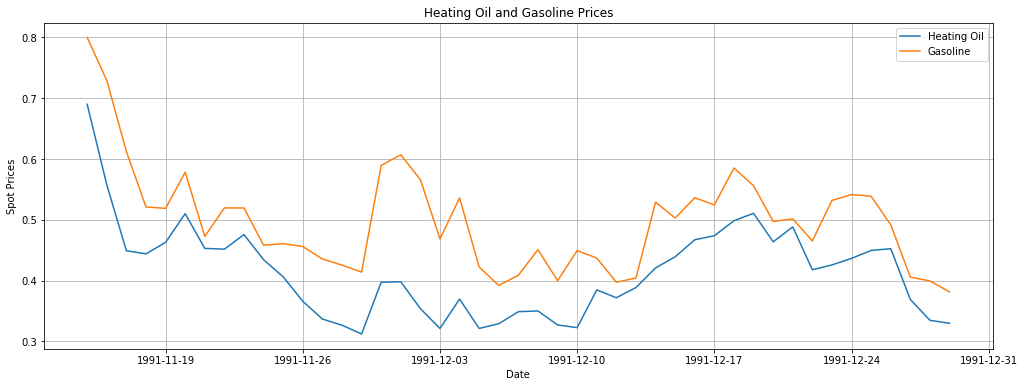

In [84]:
from datetime import date
from datetime import timedelta

ts = pd.DataFrame({'LN Heating Oil' : lnSpot1, 'LN Gasoline' : lnSpot2, 'Date' : 0})
ts.loc[0, 'Date'] = date(1991, 11, 15)
for i in range(1, numReps):
    ts.loc[i, 'Date'] = ts['Date'][i-1] + timedelta(days=1)

ts['Heating Oil'] = np.exp(ts['LN Heating Oil'])
ts['Gasoline'] = np.exp(ts['LN Gasoline'])
del ts['LN Heating Oil']
del ts['LN Gasoline']

ts.index = ts['Date']
del ts['Date']
ts.plot(grid=True, figsize=(17, 6), title='Heating Oil and Gasoline Prices')
plt.xlabel('Date')
plt.ylabel('Spot Prices');

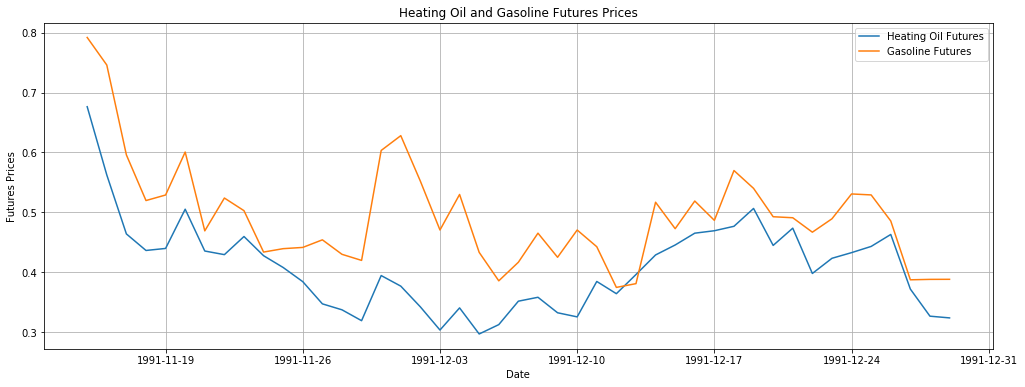

In [85]:
ts = pd.DataFrame({'LN Heating Oil Futures' : lnFutures1, 'LN Gasoline Futures' : lnFutures2, 'Date' : 0})
ts.loc[0, 'Date'] = date(1991, 11, 15)
for i in range(1, numReps):
    ts.loc[i, 'Date'] = ts['Date'][i-1] + timedelta(days=1)

ts['Heating Oil Futures'] = np.exp(ts['LN Heating Oil Futures'])
ts['Gasoline Futures'] = np.exp(ts['LN Gasoline Futures'])
del ts['LN Heating Oil Futures']
del ts['LN Gasoline Futures']

ts.index = ts['Date']
del ts['Date']
ts.plot(grid=True, figsize=(17, 6), title='Heating Oil and Gasoline Futures Prices')
plt.xlabel('Date')
plt.ylabel('Futures Prices');

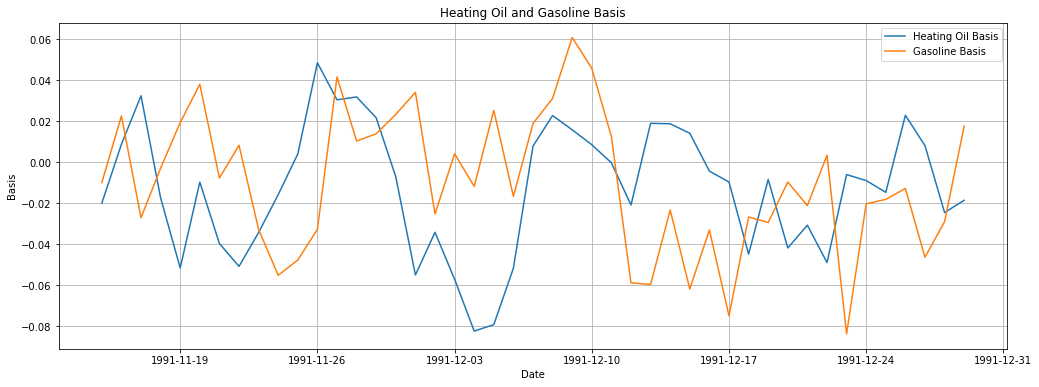

In [86]:
ts = pd.DataFrame({'Heating Oil Basis' : Basis1, 'Gasoline Basis' : Basis2, 'Date' : 0})
ts.loc[0, 'Date'] = date(1991, 11, 15)
for i in range(1, numReps):
    ts.loc[i, 'Date'] = ts['Date'][i-1] + timedelta(days=1)

ts.index = ts['Date']
del ts['Date']
ts.plot(grid=True, figsize=(17, 6), title='Heating Oil and Gasoline Basis')
plt.xlabel('Date')
plt.ylabel('Basis');

__(c)  For the simulated 45-day period calculate the market-to-market cash flows.  Assume an initial margin of 10% and variation margin of 85% of the initial margin.  Assume a position of 1 contract for each position.__

In [87]:
ts = pd.DataFrame({'LN Heating Oil' : lnSpot1, 'LN Gasoline' : lnSpot2, 'LN Heating Oil Futures' : lnFutures1, 'LN Gasoline Futures' : lnFutures2,\
                   'Heating Oil Basis' : Basis1, 'Gasoline Basis' : Basis2, 'Date' : 0})
ts.loc[0, 'Date'] = date(1991, 11, 15)
for i in range(1, numReps):
    ts.loc[i, 'Date'] = ts['Date'][i-1] + timedelta(days=1)

ts.index = ts['Date']
del ts['Date']
ts['Heating Oil'] = np.exp(ts['LN Heating Oil'])
ts['Gasoline'] = np.exp(ts['LN Gasoline'])
ts['Heating Oil Futures'] = np.exp(ts['LN Heating Oil Futures'])
ts['Gasoline Futures'] = np.exp(ts['LN Gasoline Futures'])
del ts['LN Heating Oil']
del ts['LN Gasoline']
del ts['LN Heating Oil Futures']
del ts['LN Gasoline Futures']
ts.head()

,Heating Oil Basis,Gasoline Basis,Heating Oil,Gasoline,Heating Oil Futures,Gasoline Futures
Date,,,,,,
1991-11-15,-0.020000,-0.010000,0.690000,0.800000,0.676337,0.792040
1991-11-16,0.008731,0.022612,0.557435,0.729318,0.562324,0.745997
1991-11-17,0.032418,-0.027161,0.448998,0.612222,0.463791,0.595818
1991-11-18,-0.017473,-0.002902,0.443837,0.521062,0.436149,0.519552
1991-11-19,-0.051675,0.019347,0.462836,0.518683,0.439527,0.528816


_Mark-to-Market Heating Oil Futures Position_

In [88]:
class MarginAccount(object):
    def __init__(self, spot_price, init_margin, var_margin, num_contracts, units):
        self.__ref_price = spot_price
        self.__init_margin = init_margin
        self.__var_margin = var_margin
        self.__num_contracts = num_contracts
        self.__units = units
        self.__equity = init_margin
        self.__capital = init_margin
        self.__profit = 0.0
        self.__cum_profit = 0.0
        self.__margin_call = 0.0

    def show(self):
        print("Settlement Price: \t{0:.2f}".format(self.__ref_price))
        print("Profit: \t\t{0:.2f}".format(self.__profit))
        print("Cumulative Profit: \t{0:.2f}".format(self.__cum_profit))
        print("Capital: \t\t{0:.2f}".format(self.__capital))
        print("Equity: \t\t{0:.2f}".format(self.__equity))
        print("Margin Call: \t\t{0:.2f}".format(self.__margin_call))
        print("\n")

    def update(self, spot_price):
        self.__profit = (spot_price - self.__ref_price) * (self.__num_contracts * self.__units)
        self.__cum_profit += self.__profit
        self.__equity = self.__capital + self.__cum_profit
        
        if self.__equity <= self.__var_margin:
            self.__margin_call = self.__init_margin - self.__equity
        else:
            self.__margin_call = 0.0
        
        self.__capital += self.__margin_call
        self.__ref_price = spot_price


## Main function

spot0 = ts['Heating Oil Futures'][0]
spot_t = ts['Heating Oil Futures'][1:]
units = 1
num_contracts = 1
init_margin = 0.1 * spot0
var_margin = 0.85 * init_margin

acc = MarginAccount(spot0, init_margin, var_margin, num_contracts, units) 

for i, spot in enumerate(spot_t):
    acc.update(spot)
    print("Day t={0:d}".format(i+1))
    print("--------")
    acc.show()

Day t=1
--------
Settlement Price: 	0.56
Profit: 		-0.11
Cumulative Profit: 	-0.11
Capital: 		0.18
Equity: 		-0.05
Margin Call: 		0.11


Day t=2
--------
Settlement Price: 	0.46
Profit: 		-0.10
Cumulative Profit: 	-0.21
Capital: 		0.28
Equity: 		-0.03
Margin Call: 		0.10


Day t=3
--------
Settlement Price: 	0.44
Profit: 		-0.03
Cumulative Profit: 	-0.24
Capital: 		0.31
Equity: 		0.04
Margin Call: 		0.03


Day t=4
--------
Settlement Price: 	0.44
Profit: 		0.00
Cumulative Profit: 	-0.24
Capital: 		0.31
Equity: 		0.07
Margin Call: 		0.00


Day t=5
--------
Settlement Price: 	0.51
Profit: 		0.07
Cumulative Profit: 	-0.17
Capital: 		0.31
Equity: 		0.14
Margin Call: 		0.00


Day t=6
--------
Settlement Price: 	0.44
Profit: 		-0.07
Cumulative Profit: 	-0.24
Capital: 		0.31
Equity: 		0.07
Margin Call: 		0.00


Day t=7
--------
Settlement Price: 	0.43
Profit: 		-0.01
Cumulative Profit: 	-0.25
Capital: 		0.31
Equity: 		0.06
Margin Call: 		0.00


Day t=8
--------
Settlement Price: 	0.46
Profit:

_Mark-to-Market Gasoline Futures Position_

In [89]:
class MarginAccount(object):
    def __init__(self, spot_price, init_margin, var_margin, num_contracts, units):
        self.__ref_price = spot_price
        self.__init_margin = init_margin
        self.__var_margin = var_margin
        self.__num_contracts = num_contracts
        self.__units = units
        self.__equity = init_margin
        self.__capital = init_margin
        self.__profit = 0.0
        self.__cum_profit = 0.0
        self.__margin_call = 0.0

    def show(self):
        print("Settlement Price: \t{0:.2f}".format(self.__ref_price))
        print("Profit: \t\t{0:.2f}".format(self.__profit))
        print("Cumulative Profit: \t{0:.2f}".format(self.__cum_profit))
        print("Capital: \t\t{0:.2f}".format(self.__capital))
        print("Equity: \t\t{0:.2f}".format(self.__equity))
        print("Margin Call: \t\t{0:.2f}".format(self.__margin_call))
        print("\n")

    def update(self, spot_price):
        self.__profit = (spot_price - self.__ref_price) * (self.__num_contracts * self.__units)
        self.__cum_profit += self.__profit
        self.__equity = self.__capital + self.__cum_profit
        
        if self.__equity <= self.__var_margin:
            self.__margin_call = self.__init_margin - self.__equity
        else:
            self.__margin_call = 0.0
        
        self.__capital += self.__margin_call
        self.__ref_price = spot_price


## Main function

spot0 = ts['Gasoline Futures'][0]
spot_t = ts['Gasoline Futures'][1:]
units = 1
num_contracts = 1
init_margin = 0.1 * spot0
var_margin = 0.85 * init_margin

acc = MarginAccount(spot0, init_margin, var_margin, num_contracts, units) 

for i, spot in enumerate(spot_t):
    acc.update(spot)
    print("Day t={0:d}".format(i+1))
    print("--------")
    acc.show()

Day t=1
--------
Settlement Price: 	0.75
Profit: 		-0.05
Cumulative Profit: 	-0.05
Capital: 		0.13
Equity: 		0.03
Margin Call: 		0.05


Day t=2
--------
Settlement Price: 	0.60
Profit: 		-0.15
Cumulative Profit: 	-0.20
Capital: 		0.28
Equity: 		-0.07
Margin Call: 		0.15


Day t=3
--------
Settlement Price: 	0.52
Profit: 		-0.08
Cumulative Profit: 	-0.27
Capital: 		0.35
Equity: 		0.00
Margin Call: 		0.08


Day t=4
--------
Settlement Price: 	0.53
Profit: 		0.01
Cumulative Profit: 	-0.26
Capital: 		0.35
Equity: 		0.09
Margin Call: 		0.00


Day t=5
--------
Settlement Price: 	0.60
Profit: 		0.07
Cumulative Profit: 	-0.19
Capital: 		0.35
Equity: 		0.16
Margin Call: 		0.00


Day t=6
--------
Settlement Price: 	0.47
Profit: 		-0.13
Cumulative Profit: 	-0.32
Capital: 		0.40
Equity: 		0.03
Margin Call: 		0.05


Day t=7
--------
Settlement Price: 	0.52
Profit: 		0.05
Cumulative Profit: 	-0.27
Capital: 		0.40
Equity: 		0.13
Margin Call: 		0.00


Day t=8
--------
Settlement Price: 	0.50
Profit: 	

__(d)  For the simulated 45-day period calculate a minimum-variance hedge ratio for both heating oil and unleaded gasoline.__

In [90]:
ts.head()

,Heating Oil Basis,Gasoline Basis,Heating Oil,Gasoline,Heating Oil Futures,Gasoline Futures
Date,,,,,,
1991-11-15,-0.020000,-0.010000,0.690000,0.800000,0.676337,0.792040
1991-11-16,0.008731,0.022612,0.557435,0.729318,0.562324,0.745997
1991-11-17,0.032418,-0.027161,0.448998,0.612222,0.463791,0.595818
1991-11-18,-0.017473,-0.002902,0.443837,0.521062,0.436149,0.519552
1991-11-19,-0.051675,0.019347,0.462836,0.518683,0.439527,0.528816


Heating Oil Hedge Ratio

In [91]:
x = pd.Series(ts['Heating Oil'])
y = pd.Series(ts['Heating Oil Futures'])

dS = np.diff(x)
dF = np.diff(y)

In [92]:
results = linregress(dF, dS).slope

In [93]:
print(f"The minimum-variance hedge ratio for heating oil is {results:0.4f}")

The minimum-variance hedge ratio for heating oil is 0.9587


Gasoline Hedge Ratio

In [94]:
x = pd.Series(ts['Gasoline'])
y = pd.Series(ts['Gasoline Futures'])

dS = np.diff(x)
dF = np.diff(y)

In [95]:
results = linregress(dF, dS).slope

In [96]:
print(f"The minimum-variance hedge ratio for gasoline is {results:0.4f}")

The minimum-variance hedge ratio for gasoline is 0.8912


__(e)  Do the simulated pairs of futures and spot prices appear to be cointegrated?  Why or why not?  What does the Bollen-Whaley model used for simulation suggest about cointegration?__

Yes the pairs are cointegrated. Since futures prices are a derivative of the underlying, there must be a cointegrating relationship between them, which is the basis. The basis is just the spread between the two, or $F_{i,t} = S_{i,t} * e^{b_{i,t}}$. Since this is the case, clearly the futures price will move with the spot price. 

It can be clearly seen in the graphs above that there is also a cointegrating relationship between heating oil and gasoline. The relationship is clear in the spot, futures, and the basis. 

The model that Bollen-Whaley use for simulated basis finds the futures price by directly including the spot price in the function. Since this is the case, they are assuming a priori that the two pairs are cointegrated. This is the whole basis for the strategy used by MGRM and a large portion of what we have discussed in class regarding a no-arbitrage relationship between spot and futures contracts. Since this can be assumed factual, MGRM's strategy should prove to be profitable, if we can assume that they had superior information to the general markets regarding heating oil and gasoline, as they could use this cointegrated, mean-reverting relationship to their advantage.

__4. Describe the institutional differences between forward markets and futures markets.  Describe the historical evolution of futures markets and the institutional features that define futures markets.  Why have they developed the way they have?  What market problems have they solved?__

Forwards and futures are different only by a couple of key aspects. Forward contracts are between 2 specific parties, rather than through an exchange like futures contracts. Also, forward contracts can be customized to include very specific features such as quantities to be exchanged, dates, or more unique features desired by the traders. Futures contracts, since they are traded on an exchange, are standardized. This does improve liquidity of the contracts, however, and it is much easier to unwind your position.

In his paper 'The Origin of Futures Markets', Williams discusses some history of futures markets. The Chicago Board of Trade officially traded futures in 1865, however there is evidence of futures trades occuring much earlier than that. There were contracts stated as 'To-arrive' contracts that look just like futures contracts. These were written on a large variety of commodities. There is even evidence of options traded on futures contracts as early as 1847.

There is strong evidence in the mid-1800s that futures trading occurred even more often than physical trading. 'To-arrive' contracts and future delivery contract volume far exceeded physical volume, even in the dullest of trading days. Rather than increments like the physical markets, futures contracts were traded in round lots of sizes like 100, 500 or 1000. This is evidence that traders weren't interested as much in how much of the commodity they would be receiving, but how easily they could offset the position. This is clear evidence that traders were speculating rather than trading for hedging purposes.

Since The Chicago Board of Trade officially traded futures, markets have grown extensively. There are now futures on commodities, currencies, stocks, bonds, and much more. Though markets are much more advanced today, there seems to have always been a need to trade forward, and not only for hedging, but for speculative purposes. This comes down to Hayek's 'The Knowledge Problem'. Futures prices were needed to relay information regarding future prices of commodities, and for that reason we can see a history of futures markets much further back than many studies suggest.

Contrary to most studies, Williams believes that futures markets have been in existence for a long time. From the papers we have read thus far this semester, I would tend to agree with Williams, even though futures exchanges haven't existed for as long as evidence can be shown of futures trades.

Williams also argues that there is essentially no difference between futures contracts and forward contracts. I will touch on this briefly as I have already stated the mechanical difference in the first paragraph. In his paper, Williams states that the 'To-arrive' contracts being traded were almost standarized, which does point more towards futures contracts. Since there are only mechanical differences in these contracts, I agree with Williams that they are essentially the same.

Futures exchanges can also rely on a Clearing House to match and reconcile trades of futures contracts. The Clearing House will ensure financial integrity to remove the risk of non-payment at time=T. The Clearinghouse will also increase liquidity, adding to this advantage of futures contracts over forward contracts. A Clearing House works by depositing large sums of money into a guarantee fund as insurance for any potential non-payment. Any clearing members must be members of an exchange, and they must purchase shares of the exchange. Any exchange members who are not clearing members must clear trades through a clearing member and pay a fee.

__5. Consider the paper that was presented in class by Liu titled Price Relations Among Hog, Corn, and Soybean Meal Futures.__

__(a)  What  were  the  main  empirical  findings  of  the  paper?   What  statistical and econometric methods were used by the author?  Were  you persuaded by the author’s evidence?__

The paper first tests each of the three series for stationarity using a unit-root test. The results fail to reject the null hypothesis of a unit-root. They then first difference each of the respective series and subject each first differenced series to the unit-root test and reject each at at least the 5% significance level, suggest each is integrated of order 1.

Next, a multivariate cointegration test is used to test if the three series are cointegrated. The test we are familiar with from class is the Engle-Granger test for cointegration, which uses the residuals from a regression of series and subjects them to the Augmented Dickey-Fuller test to find if the spread is integrated of order 0. The paper uses more advanced econometric models, but rejects the null hypothesis that the series are not cointegrated.

The paper finds that lean hog, corn and soybean meal futures are cointegrated in the presence of significant time trends and seasonal factors. The cointegrating vector results from this test are a little different than the Gross Hog Feeding Margin calculated earlier in the paper, and this can be explained since farmers don't exclusively feed corn and soybean meal to hogs, but also include a variety of other foods that aren't available in the futures market to include in the hog spread.

The error-correction model is estimated for each of the variations included in the spread, and then a strategy is formulated by buying (selling) hog when hog is underpriced (overpriced) relative to corn and soybean meal and selling (buying) corn and soybean meal. The strategy shows there is profit to be made in the strategy.

The strategy works because of inefficiencies in the market for these futures. The paper explicitly states that if traders knew of this cointegrating relationship between these contracts, the spread would be traded until the inefficiencies were taken away, indicating a view that markets are not in equilibrium but are working their way towards equilibrium, closer to a neoclassical view of market efficiency.

I would not invest in this trading strategy for a few reasons. First, though there is a clear cointegrating relationship between hog, corn and soybean meal futures, I am wary of all of the possible substitutes for either of these food options for hogs. If there were to be a global shortage of corn, farmers could easily substitute for one of the many other options listed in the paper, which isn't even all-inclusive. So if I were to be short hog and long corn and soybean, I don't believe there would be a strong enough error-correction in the price of hog to make up for the losses that could be endured for extreme conditions that affect only corn or soybean supply.

Also, as stated in the paper, as more traders seek this arbitrage opportunity, the opportunity will fade. As soon as this paper was published, I would believe many arbitrageurs would see if before me and start trading the spread. So if I did try to invest, I believe the profit to be made would have already dissipated.

Bayes' rule is important here since traders either have a prior view that markets are effiecient or they have a prior view that markets are inefficient. Prior to this paper, I had a prior belief that markets were inefficient, but wouldn't have thought of a trading strategy such as the hog spread. The paper did move my prior, as I would not have previously thought of trading this spread should it have been suggested to me until I saw the econometric models in the paper showing the clear cointegrating relationship. The strategy, when implemented from 1985-2001 is profitable almost 90% of the times the spread is traded. Though this was good evidence, it was not enough out-of-sample evidence for me with no clear predictive density to show the real risk inherent in the strategy, and is the final reason the paper would not convince me to invest my own money in the hog spread.

__(b)  At the beginning of the course we read the appendix on the history of thought on equilibrium concepts in economics from Culp’s book Risk Transfer, in which the author states “it becomes quite hard to explain a lot of financial and derivatives market activity without being a little bit Austrian.”  How does that idea apply to the empirical findings of Liu? Do you think that statement is true?  Can you give Liu’s econometric model (the error-correction model) a neo-Austrian interpretation?__

The neo-Classical belief is that markets are in a stationary state of equilibrium. If this is the case, there would be no arbitrage opportunities in either spot or derivatives markets. Markets would also be efficient, and all investors would be best off if they took very passive strategies and just invested in the market as a whole. Derivatives markets may not even exist, as we see implied in the paper by Quintana, Carvalho, Scott, and Costigliola.

Austrians believe that markets trend towards equilibrium. This is what I believe is the statement that Culp is trying to make when he says that markets can only be explained if you look at it from at least a small Austrian perspective. This to me makes a lot more sense, as markets have inefficiencies in them that are exploited daily by hedge funds, traders and market-makers.

This statement applies to the empirical findings by Liu, as the cointegrating relationship between the 3 commodities under scrutiny are not constantly in a stationary state, but they trend towards a constant spread. This is a clear Austrian view of markets, and shows an arbitrage opportunity in the futures markets based on this Austrian interpretation.

The error-correction model is a great example of the Austrian perspective at work. The lambda paramater works as the error-correction variable that pulls the futures prices back into equilibrium. Though there will be a mean-reverting trend in the spread, they are not in a state of stationary equilibrium, as the neo-Classicals would suggest.

__(c)  At the end of the paper Liu conducts some trading simulations.  Outline the methodology that Liu uses to conduct these trading simulations.  Why is that necessary?  Do you find the simulations convincing? Would you place real money on his trading model?  If not, what would it take to convince you that the model really is predictive of abnormal profits?__

Liu's trading simulations are based off of the residuals obtained from his error-correction model. He has 4 different simulations where he takes the standard deviation of the residuals and multiplies it by 0.25, 0.5, 0.75, and 1. In each respective model, when the spread between the futures prices crosses the upperbound determined by the respective multiple, one commodity is sold short and the proceeds are used to purchase the other commodity. This is the trigger mentioned in the paper. Once the spread returns to its long-run mean, the position is reversed, and the profits are realized as shown in table VII. Each respective strategy is shown to make money on average, though some positions are entered for much longer than others.

It is necessary to conduct these simulations to show that the strategy will work out-of-sample, rather than just data-snooping by showing that the results would work over the in-sample time period. The simulations seem very convincing, with significant returns and very small p-values for each respective strategy.

In the time period the paper was written, I would definitely place real money on his trading model. The error-correction method shown in the paper has great econometrics behind it, and shows that there is a true cointegrating relationship between the 3 commodities. The strategy is a great way to simulate profits made by a hog breeder, and I believe the out-of-sample simulations provide sufficient evidence of abnormal returns regardless of the condition of the market. I would be wary, however, to invest once the paper is published, as this would result in many other traders searching for the same abnormal returns, which could take away the arbitrage opportunity and result in 0 or negative profit.

__6. In class we discussed the case of oil hedging by Metalgesellschaft (MG). In their paper Metalgesellschaft and the Economics of Synthetic Storage Culp and Miller defended MG’s hedging strategy.  Pirrong strongly criticized Culp and Miller’s findings in his paper Metalgesellschaft: Prudent Hedger Ruined, or a Wildcatter on NYMEX?.  Please answer the following questions about the debate over MG’s hedging strategy.__

__(a)  Culp & Miller called MG’s main hedging strategy Synthetic Storage. Please  outline  the  basics  of  this  strategy,  and  explain  how  it  differs from risk minimizing hedging.  In your explanation, you may want to reference the ideas of the economist Holbrook Working cited by Culp & Miller regarding hedging strategies and the motives for hedging.__

The basic strategy of synthetic storage is based off of the assumption that oil prices are generally in backwardation rather than contango because of the convenience yield for physical storage of oil. Since there is this convenience yield, a synthetic storage convenience yield can be gained by implementing a stacked hedge. This means that a firm like MGRM will sell fixed, long-dated contracts to its customers and then hedge the contracts with short-dated futures contracts. MGRM is rewarded for 'lending' its oil through futures contracts, and still gets the convenience yield associated with the synthetic storage without having to pay the storage fee for physical storage.

The difference between this synthetic storage and a risk minimizing hedge is that the risk minimizing hedge finds the hedge ratio that minimizes the variance of profits received through the strategy. It will generally be through a risk-minimizing hedge ratio as computed in Pirrong's paper. This hedge is very dynamic, and would require as much rollover costs as the synthetic storage strategy, but would reduce the risk of loss that would occur if oil prices were to enter into contango, such as would be incurred by the synthetic storage strategy.

The hedge results in a positive NPV for MGRM. This doesn't, however, mean that MGRM's customers will expect a negative NPV for entering into the contract with MGRM. Customers generally have a high cost of storage, and the opportunity cost of the contract will result in a much higher NPV for customers than having to store the oil for themselves. Culp and Miller mention that if they could, each customer would invoke the synthetic storage strategy for themselves, but as far as derivatives go large conglomerates like MGRM have a large competitive advantage for that market. This is a key point when we look at the Pirrong paper, who states near the end that regardless of your prior belief, his models show that MGRM does not have a competitive advantage in this industry. I believe Culp and Miller do an extraordinary job of showing how the synthetic storage strategy works for MGRM, and includes much greater expected profits when compared to Pirrong's risk-minimizing hedge, with minimal exposure to large losses.

Another key aspect of the contracts MGRM used for synthetic storage is the look-back option. These options take effect when the front-month futures price rises above the fixed delivery price of the flow contract. These flow contracts are the cause of losses for MGRM when the oil markets enter into backwardation. MGRM created an ingenious addition to their contracts with these look-back options. When you look at it from the customers' perspective, they must take the present value of their cash flows into consideration. Since they are not hedged like MGRM, if they expect a surge in spot prices to remain permanent, they would exercise this look-back option to keep the present value of their expected cashflows maximized. This option within the contract minimizes MGRM's risk to this negative NPV of the flow contract should oil markets enter into backwardation.

Culp and Miller mention that this synthetic storage strategy is in-line with Working's definition of hedging rather than the now oft assumed definition of variance-minimizing hedge. Rather than just trying to minimize the variance of its cashflows, MGRM got itself into a risk-neutral position, where it didn't care if oil prices rose or fell, and also didn't care about costs of bankruptcy due to the position it had with its creditors. This was still a hedged position according to working, but led to much debate regarding this fact from authors such as Pirrong.

__(b)  One of the main points of disagreement between Culp & Miller and their critics, especially Pirrong, is over the proper hedge ratio for MG’s hedging strategy.  What do you think the correct hedge ratio was for MG? Can you outline an empirical strategy for estimating the proper hedge ratio?  Explain.__

Pirrong states that the riskiness of a barrel-for-barrel hedge on crude oil is completely dependent on the dynamics of oil prices. He also states that a variance-minimizing hedge wasn't the only appropriate hedge for MGRM, but that it is a benchmark to compare the risk inherent in other hedging strategies. He then continues to produce his so-called 'best' hedge strategy for MGRM, which is a continually adjusted dynamic hedge ratio. This creates for the firm a synthetic forward position. He argues that since backwardation is a random variable, the hedge ratio should change randomly as well.

Even though Pirrong states that a minimum-variance hedge is not the only optimal hedge for MGRM, he still believes that the definition of hedging is to risk-minimize the strategy, contrary to the belief of Working cited by Culp and Miller. Pirrong employs econometric models to outline a risk-minimizing hedge for MGRM, which is very dynamic in nature. I do not disagree with Pirrong regarding the best strategy for MGRM should they be wanting to minimize the variance of its cash flows, however Pirrong doesn't take into account the risk-neutral situation that MGRM puts itself in as cited by Culp and Miller MGRM acts as a market-maker for oil contracts as it has specialized information that allows it to have a competitive advantage in the oil industry.

Pirrong also believes that many of the assumptions made by Culp and Miller were generous. For example, the discount rate used by Culp and Miller was the 3-month T-bill, even though the rate received by creditors was higher. He also talks about the lack of interpretation regarding the intervention from creditors when they saw the marked-to-market losses incurred by MGRM. He again states that a variance-minimizing hedge would have significantly reduced these risks. I believe Pirrong has a point, especially regarding the creditors that didn't know the finance or econometrics behind the stacked hedge strategy. I believe that this was a risk that MGRM didn't sufficiently incorporate into their strategy of their hedge, though I do still believe it is a hedge as it put them in a risk-neutral position, even if only according to Working's definition.

Depending on what MGRM wanted to do, there are different answers to the question 'what is the correct hedge ratio'. However, knowing the ratio they went with, we can believe that MGRM was not looking for a variance-minimizing hedge, and was rather speculating and wanting a risk-neutral position due to their superior market knowledge.

The empirical strategy outlined by Pirrong regarding the hedge ratio is a dynamic hedge obtained through a very complex econometric model that continues to adapt as new information regarding spot and futures prices are obtained. Pirrong clearly shows that the hedge ratio is significantly less than 1, and this makes sense.

__(c)  At the end of his paper, Pirrong states “Given the huge losses incurred in late 1993, a Bayesian estimating the probability distribution of MG’s information  advantage  would  almost  certainly  place  little  weight  on the possibility that the firm was well informed, and great weight on the possibility that it did not possess superior information, regardless of  the  charitability  of  his  priors  concerning  the  prescience  of  MG’s managers.” Why do you think Pirrong invokes Bayes’ Rule? Comment on this statement by Pirrong.__

Bayes' Rule can be invoked to describe the predictive distribution, which we can see in the paper by Bollen and Whaley. We see that there is a skewed distribution for the stacked hedge, rather than the normal distribution for the variance minimizing hedge. The skew shows in the predictive density that the stacked hedge has a slightly higher probability of an extreme loss, but that the probability of higher returns was much, much higher.

Pirrong invokes Bayes' Rule to offset the belief that MGRM had superior information, as Culp and Miller oft stated in their paper as a main reason that MGRM was able to work as a market-maker. Pirrong wanted to show that regardless of how informed you thought MGRM was after reading Culp and Miller's paper, his econometric models and dynamic hedge stratey created would prove that if MGRM was really informed they would have used a minimum-variance hedge. I believe he is trying to show overconfidence in his models, stating that regardless of the charitability of ones' priors, his models would still show that any informed firm would use a variance-minimizing hedge, but MGRM wasn't trying to minimize its variance, but rather maximize profits, which is what any firm should do.

__(d)  Relate your answer in part (c) to the concept of the predictive distribution.  What is the importance of the predictive distribution in this hedging application?__

The predictive distribution would show the distribution of outcomes if each respective hedging strategy were in place for the period of the contract. We can see in the paper by Bollen and Whaley that the distribution of the minimum-variance hedge looks very normal, whereas the stacked hedge results in a skewed distribution. The predictive distribution would allow MGRM to see the distribution of their returns from a Bayesian perspective, rather than a single point estimate that is generated from a frequentist perspective such as Pirrong.

This distribution clearly shows that a profit maximizing firm will choose the stacked hedge rather than the variance-minimizing hedge. MGRM was clearly looking to increase firm value by implementing the strategy, and we can see through the predictive distribution that the stacked hedge strategy should've done this in a remarkable way.

__(e)  Energy markets such as the oil market are often historically characterized by backwardation, but have also had long periods of contango. Does that matter for MG’s synthetic storage strategy?  Explain.__

In the long-run, this doesn't matter for MGRM's strategy as it put itself in a position to make money regardless of the state of the basis. If the markets were in backwardation, MGRM would make money off of the stacked hedge strategy through the convenience yield gained by the synthetic storage strategy.

As stated in part A, if the markets were in contango, MGRM customers would exercise their look-back options, giving MGRM an exit from a large loss due to the customers' own loss aversion as they have to account for the present value of the cash flows from the contract with MGRM.

Since this doesn't matter for MGRM's strategy, we can see in Bollen and Whaley that if the strategy had been allowed to continue, regardless of the periods of backwardation or contango in the market, the strategy would have most likely been profitable. Even though the strategy had a larger possibility of an extreme loss, the probability is still so low that the expected return was much, much greater than the variance minimizing hedge showed by Pirrong.

__7. Consider the following two papers:__

    i. Orange Juice and Weather by Richard Roll.
    ii. Is Sound Just Noise? by Coval & Shumway.

__Both papers deal with the informational role of prices in a market setting. Relate the findings of each paper to the main idea in Hayek’s paper The Use of Knowledge in Society.  Does the evidence in the article support Hayek’s main thesis?  If so, how?  Explain.  Be careful to give an economic interpretation to any statistical or econometric measure used in the article.  Also, explain the data that were used in the respective study.__

__Orange Juice and Weather by Richard Roll__

Orange Juice and Weather talks about how orange juice futures prices reflect information gained through weather reports. Orange juice is a great subject for this study, since 98% of orange juice concentrate in the US is produced in the Orlando, Florida region, so weather patterns in that region would have a large impact on nationwide orange juice prices. The paper specifies that farmers' planting decisions and prices of fertilizer and petroleum have minimal if any effect on orange juice prices, providing more evidence that the orange juice is right for this study of weather.

Hayek's paper about The Knowledge Problem talks about how knowledge can best be distributed in society. This paper relates directly in that knowledge of the impact of weather patterns can be directly spread throughout society through orange juice futures prices. Orange trees in Florida cannot handle freezing temperatures for a sustained amount of time, and need a substantial amount of rainfall. This means that when there is an expected period of freezing temperatures, future supply of orange juice will decline, which should have an immediate and significant impact on orange juice futures prices.

One more important note before I get into the discussion on the relevance of price information reflecting weather patterns is the price fluctuation limit imposed on orange juice futures by the exchange. There is a limit restricting trading on the futures if there is too large of a price fluctuation to limit large gains or losses in a single trading day. Though this does theoretically help those with large positions, if we look back at Hayek's paper on The Use of Knowledge in Society, this is a very inefficient way to deal with the spread of information. When a limit is imposed, the days that trading is halted, information flow is also halted for the rest of the day and prices are then very inefficient though there is no opportunity in the market to gain from the inefficiency. The paper deals with this issue by looking at the closing prices of the next non-limit day and taking it back to the limit-days to try its best to reflect the information, but it is still an inefficiency when looked at from Hayek's perspective.

The evidence in the article shows that futures from 2-6 months in range do reflect information regarding weather impacts on orange juice futures prices. However, there is only a statistically significant impact on temperature patterns, particularly when freezing temperatures occur. We would have an a priori belief that only freezing temperatures would have a significant effect on orange juice futures prices, however non-freezing temperature patterns reveal some predictive probability that future weather will exhibit freezing temperatures, which explains why all available weather information provides predictive information for orange juice futures prices.

Rainfall is not as efficient in predicting prices for a couple of reasons. First, weather forecasts available to the public only state whether or not there will be any amount of rainfall, not the specified amounts, leaving great variability in the information conveyed. Second, it is much easier to provide more water to oranges if there should be a drought, and only very severe conditions like a Hurricane would provide enough water to do any damage to orange crops. This is why the t-statistic is low when looking at the impact of rainfall forecasts on orange juice futures prices.

The data used in the study was the futures prices on orange juice concentrate from 2-6 month contracts, as well as public weather forecasts on weather patterns. There were separate tables for AM and PM information, as most of the predictive power came from the PM forecasts, since that is when the freezing temperatures would occur. The paper also looked at maximum and minimum forecasts for each day and used lagged variables to show the predictive power from one day to the next and the possibility of extended freezing temperatures.

Though there is statistical evidence that cold weather does influence futures prices, the amount of variation explained is still a small amount. In fact Roll looked at many other factors that could potentially impact futures prices such as correlation to oil prices, economic downturns, and foreign currency exchange rates. Though many of these were significant, weather patterns showed the most predictive roll in predicting futures prices. Though with all of these factors included in the model, only 27% of the variability in prices was shown, to which most is attributed to the temperature forecasts. Going back to Hayek's paper, this shows that much more information is being reflected in prices that even advanced econometric models can't capture. However, it is important to note that the weather patterns are in fact providing relevant information to traders regarding price movements.

__Is Sound Just Noise? by Coval & Shumway__

Is Sound Just Noise? was written in a time period when the majority of trading still occurred in trading pits with traders yelling at eachother to buy or sell different positions. The study looked at the 30-year treasury bond futures trading pit, and tested multiple hypotheses regarding information that could be gained from the sound decibel level observed in the pit at any given time. They believed that noise was a precursor for increased volume, price movements, and decreased depth. They also believed it reflected anxiety that traders had to unwind their large positions by the end of the day.

The mere hypotheses proposed in this paper are greatly in-line with Hayek's notion that available information is shown in prices. Coval and Shumway note that as exchanges started shifting more towards electronic trading, much of this information would be lost in prices. One example given in the paper is when the 10-year treasury note pit was moved about 25 feet away from the pit under scrutiny. Traders complained that they no longer knew what was going on in the recently adjacent pit, and had less information to trade on. When screens were placed in their pit to try to relay this information, they went unused, showing that it was the noise the traders were looking for.

Again referencing Hayek's paper, this noise was one of the most efficient ways for traders to relay information through prices. When the pits got very loud, this meant there was greater anxiety for traders to get their orders filled, and the volume increased to show this, leading to more efficient prices.

Looking at the paper from a more technical aspect, each of the hypotheses was tested, and then retested with many different lags, including the Akaike Information Criterion, and this showed significant results that were unchanged by the number of lags chosen. It showed that with an increase in the standard deviation of sound of 1, there was a 17% increase in the probability of a price change of 2 ticks or greater. This is statistically and economically significant. In simpler terms, this means that an increase in sound volatility is almost definitely reflected in near-future prices.

The study also concluded that sound can predict supply and demand schedules, as well as future market depth. However most importantly, it shows that traders are not focusing only on readily available information such as past prices and news announcements, but are also focused on sound, as well as many other unrecognized factors not looked at in the paper. This is a notion that Hayek would readily support, showing that knowledge is vastly shown in prices.

__8. Read the paper Futures markets, Bayesian forecasting and risk modeling by Quintana, Carvalho, Scott, and Costigliola.  Relate the main idea of the paper to the articles that we have read in this course and the themes that we  have  developed.   There  is  a  technical  aspect  to  this  paper.   Don’t  get bogged down in the technical details, instead focus on the main ideas and concepts.__

The main idea of this paper is to discuss whether markets are strong form efficient, or in other words they are always in equilibrium, or if there are inefficiencies allowing for market-makers to exist. The paper takes a strong Bayesian perspective. The paper also suggests, as we have discussed in class, that markets are not in equilibrium, but are continuously moving towards equilibrium through price discovery as traders are incorporating new information into their trades and market-makers are setting bid and ask prices appropriately to continuously incorporate this new information.

This process is a Bayesian model as market-makers and traders alike are constantly updating their Bayesian models to incorporate new information and rely less on their priors. The predictive density for payoffs is informed and traders can see the probabilistic graph of their possible returns.

Unless market incoherencies are identified, the only way to beat the market is to increase your risk respective to the market. These incoherencies are arbitrage opportunities that are taken by traders that help the markets reach equilibrium. These opportunities are also why market-makers can exist. Without inefficiencies, trades would be essentially extinct as there would be no expected return greater than the market return, and traders would have very passive strategies. This would cause all trades to be done to occur with no spreads, otherwise the trades wouldn't occur, thus eliminating the role of market-makers for lack of profitability.

The paper discusses the role that futures markets play as Bayesian market-makers by quoting fair prices that represent and incorporate all relevant information regarding future expectations of the underlying commodities. The paper mentions how individual traders may not have all the information, but all the traders together become an intelligent market-maker, and this role is reflected in the futures markets. According to the effiecient markets hypothesis, this is a state of equilibrium whereupon market efficiency cannot be improved.

This futures market as a Bayesian market-maker can be bet against simply by buying or selling futures contracts. If you believed markets were in disequilibrium as is mentioned in the paper, and all information was not reflected in prices, you could buy a futures contract if you believed there was information withheld from the market that would increase the spot commodity to a price higher than the futures price at expiry, or sell a futures contract if you believed there was information moving markets in the opposite direction.

This discussion comes back to Hayek's discussion of The Use of Knowledge in Society. Hayek believed prices reflected information, and this is exactly what is being discussed in this paper. Even if there are temporary inefficiencies, traders will act quickly on these opportunities and cause markets to push closer to an equilibrium. Hayek would agree that the futures market is acting as a single market maker, reflecting available information regarding future prices of underlying commodities and providing fair trades in the futures prices.

__9. In  class  we  have  spoken  about  innovations  in  the  derivatives  markets. Comment on what you think will be the shape of innovations in derivatives markets in the next two decades.  What things that are not now traded on exchanges, or with derivatives that you think will be?  How will this facilitate global commerce?  Outline a business strategy that does not now exist that you think someday might soon exist if derivatives markets are created. What is the role for data and data analysis in your proposal?__

I found the weather derivatives very interesting. I originally thought that the contracts would only be to help farmers and other agricultural workers whose profits depend on weather, but looking at some of the contracts that are based off an index for the temperature during a specific month, I realize there are a lot more applications for the contracts. For example, utility companies that charge a flat to consumers could use the contracts to hedge their risk that a particular summer is very hot and their customers are all running their air conditioning. There could even be a use for the contract for ice cream producers, that could sell the contracts to hedge the chance of a very rainy summer where not many people buy ice cream. There are countless applications, and that's why I find these types of markets so interesting.

Looking at these contracts, they have to be priced differently than normal futures contracts, as there is no underlying spot market. The basic futures equation will no longer work, and there will no longer be a no arbitrage relationship based on the underlying. There will, however, be a no arbitrage relationship between these contracts and other securities that deal with weather such as catastrophe bonds. These bonds that payout in the event of severe weather conditions would have to have a cointegrating relationship with the futures contracts on weather, or there would be an arbitrage relationship. There are many other securities that deal with weather conditions, and all of these markets will provide a no arbitrage relationship for these contracts even though there is no underlying security.

When trying to think of a derivative that could come about in the future I thought of a swaption for a mortgage. Most people want fixed rates on their mortgages so that they know how much they will be paying and to make sure the rate won't go up, but then if mortgage rates go down there are costly refinancing fees so that homeowners can lower their rates. If there were to be a swaption to swap fixed for floating in the event rates decrease, this could save homeowners these fees for refinancing. The bank would still get the premium for the swaption if it is not exercised. I obviously don't know if the price of this swaption would be worth the benefit provided, and maybe that's why nothing of the sort exists, but I do think it is an interesting idea.

Data analysis would be needed on a massive scale to price these swaptions, as there would have to be an input of probability that the housing market in a certain community would fall at certain points in time. I don't know enough about the Black Scholes model to state this factually, but my assumption is that a new model would be needed to price this as it would have very complex inputs. This would, however, facilitate global commerce by providing banks with more income from premiums on these swaptions, and also provide prospective homeowners that are wary to buy as they believe rates will fall an insurance that would allow them to pay the lower rate if the option is exercised. The biggest problem I see is that as rates go back up, homeowners again would prefer to refinance to lock in the lower rate rather than risking the rate rise again, but I do still believe there is a market for these securities, especially for homeowners with a short life remaining on their mortgage.

There has been much innovation in derivatives markets, and they have been constantly developing as we have seen this constant theme throughout the semester. Even recently large innovations such as the MBS have come about, and I expect we will continue to see advanced instruments come into the market that will increase the economy and provide various opportunities for expansion by hedging opportunities through these new derivatives.